# Bellek Tabanlı Sınıflandırma
Bellek tabanlı sınıflandırma, makine öğrenmesinde "öğrenmek yerine hatırlamaya dayalı" bir yöntemdir. Yani model verileri ezberler, ama parametre öğrenmez. Yeni bir örnek geldiğinde, daha önceki örneklerle olan benzerliğine göre karar verir.Bütün eğitim verisini bellekte saklar ve sınıflandırmayı yeni örnek ile önceki örnekler arasındaki uzaklık üzerinden yapar.

## Uzaklık Hesaplama Formülü (Öklid)

![Öklid Uzaklık](images/oklid_formul.png)

- Yeni gelen bir örnek Xyeni alınır.
- Eğitim verisindeki her Xi örneğiyle Öklid uzaklığı hesaplanır.
- Uzaklığı en küçük k komşu seçilir (değeri biz belirleriz).
- Bu komşuların sınıf etiketlerine göre çoğunluk oyu alınır → sınıf tahmini yapılır.

## En yakın k-komşu algoritması
- K parametresi belirlenir. Bu parametre verilen bir noktaya en yakın 
komşuların sayısıdır.
- Söz konusu nokta ile diğer tüm noktalar arasındaki uzaklıklar tek 
tek hesaplanır.
- Yukarıda hesaplanan uzaklıklara göre satırlar sıralanır ve bunlar 
arasından en küçük olan k tanesi seçilir.
- Seçilen satırların hangi kategoriye ait oldukları belirlenir ve en çok 
tekrar eden kategori değeri seçilir.
- Seçilen kategori, tahmin edilmesi beklenen gözlem değerinin 
kategorisi olarak kabul edilir.


Sınıflandırma Raporu:
              precision    recall  f1-score   support

       Geçti       0.84      0.91      0.87       149
       Kaldı       0.65      0.51      0.57        51

    accuracy                           0.81       200
   macro avg       0.75      0.71      0.72       200
weighted avg       0.79      0.81      0.80       200

Doğruluk Oranı: 0.805

📌 1. Test Gözlemi için:
En yakın 5 komşunun indeksleri: [2.71845544 2.93598365 3.25269119 3.36600654 3.43074336]
Bu komşuların uzaklıkları: [440 565 525 464 516]
  1. Komşu → İndeks: 2.718455443813638, Uzaklık: 440.00, Sınıf: Geçti
  2. Komşu → İndeks: 2.93598365118064, Uzaklık: 565.00, Sınıf: Geçti
  3. Komşu → İndeks: 3.2526911934581166, Uzaklık: 525.00, Sınıf: Geçti
  4. Komşu → İndeks: 3.3660065359413625, Uzaklık: 464.00, Sınıf: Geçti
  5. Komşu → İndeks: 3.430743359681691, Uzaklık: 516.00, Sınıf: Geçti

📌 2. Test Gözlemi için:
En yakın 5 komşunun indeksleri: [4.34971263 4.68721666 4.96386946 5.01398045 5.03487835]
B

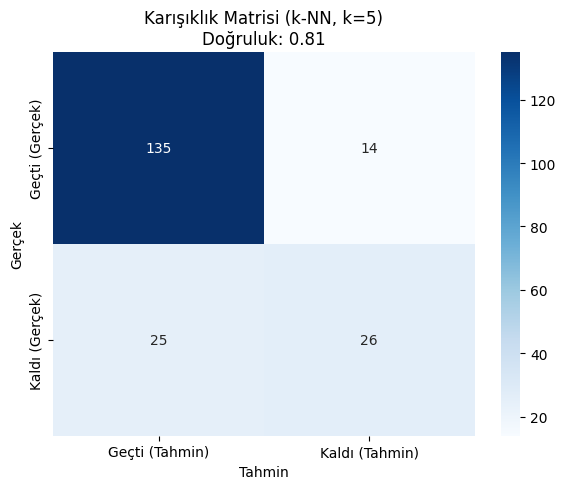

In [ ]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("data.csv")

df['result'] = df['exam_score'].apply(lambda x: 'Geçti' if x >= 60 else 'Kaldı')

# Kullanılmayacak sütunları çıkarıyoruz
X = df.drop(columns=['exam_score', 'grade', 'student_id', 'result'])
y = df['result']

X_encoded = X.copy()
label_encoders = {}
for col in X_encoded.select_dtypes(include='object').columns:
    le = LabelEncoder()
    X_encoded[col] = le.fit_transform(X_encoded[col])
    label_encoders[col] = le

# Eğitim ve test verisi olarak ayırıyoruz
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# k-NN modelini oluştur ve eğit (örnek olarak k=5)
# Yeni bir gözlem (test verisi) geldiğinde, eğitim setindeki tüm örneklerle uzaklık hesaplanır ve bu uzaklıklar küçükten büyüğe sıralanır. İlk k=5 tanesi en yakın komşular olur.
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Test verisiyle tahmin yapıyoruz
y_pred = knn.predict(X_test)

# Sonuçlar raporlanıyor
print("Sınıflandırma Raporu:")
print(classification_report(y_test, y_pred))
print("Doğruluk Oranı:", accuracy_score(y_test, y_pred))

distances, indices = knn.kneighbors(X_test)

# Örneğin ilk test verisinin en yakın 5 komşusu:
# k-NN sonuçları: en yakın komşuların indeksleri ve uzaklıkları
indices, distances = knn.kneighbors(X_test)

for i in range(5):  # İlk 5 test gözlemi için
    print(f"\n📌 {i+1}. Test Gözlemi için:")
    print("En yakın 5 komşunun indeksleri:", indices[i])
    print("Bu komşuların uzaklıkları:", distances[i])
    
    # Komşuların sınıflarını al ve yazdır
    komsu_siniflari = y_train.iloc[indices[i]].values
    for j, (indeks, uzaklik, sinif) in enumerate(zip(indices[i], distances[i], komsu_siniflari)):
        print(f"  {j+1}. Komşu → İndeks: {indeks}, Uzaklık: {uzaklik:.2f}, Sınıf: {sinif}")


accuracy = accuracy_score(y_test, y_pred)

# Karışıklık matrisini oluştur
conf_matrix = confusion_matrix(y_test, y_pred)

# Karışıklık matrisini çiz
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Geçti (Tahmin)', 'Kaldı (Tahmin)'],
            yticklabels=['Geçti (Gerçek)', 'Kaldı (Gerçek)'])
plt.xlabel("Tahmin")
plt.ylabel("Gerçek")
plt.title(f"Karışıklık Matrisi (k-NN, k=5)\nDoğruluk: {accuracy:.2f}")
plt.tight_layout()
plt.show()

# Ağırlıklı Oylama

Ağırlıklı oylama, k-En Yakın Komşu (k-NN) algoritmasında tahmin doğruluğunu artırmak için kullanılan bir yöntemdir. Temel amaç, yakın komşuların daha fazla etkili olmasıdır.

Ağırlıklı oylama, k-En Yakın Komşu (k-NN) algoritmasında kullanılan bir tekniktir. 

Ağırlıklı oylama yöntemi gözlem değerleri için aşağıdaki bağıntıya göre ağırlıklı uzaklıkların hesaplanmasına dayanır.

![agirlikli_oylama](images/agirlikli_oylama.png)
- Her komşunun oyu, mesafenin tersiyle orantılı olarak verilir.
- En büyük ağırlıklı oylama değerine sahip olan sınıf değeri yeni gözlemin ait 
olduğu sınıf olarak kabul edilir.
- Ağırlıklı oylama aslında gözlem değerlerinin tümüne uygulanarak bir
 sonuca ulaşılabilir.Ancak çok sayıda gözlemin olduğu veri kümelerinde işlemleri yavaşlatır.

Ağırlıklı k-NN Sınıflandırma Raporu:
              precision    recall  f1-score   support

       Geçti       0.85      0.91      0.88       149
       Kaldı       0.66      0.53      0.59        51

    accuracy                           0.81       200
   macro avg       0.75      0.72      0.73       200
weighted avg       0.80      0.81      0.80       200

Doğruluk Oranı: 0.81


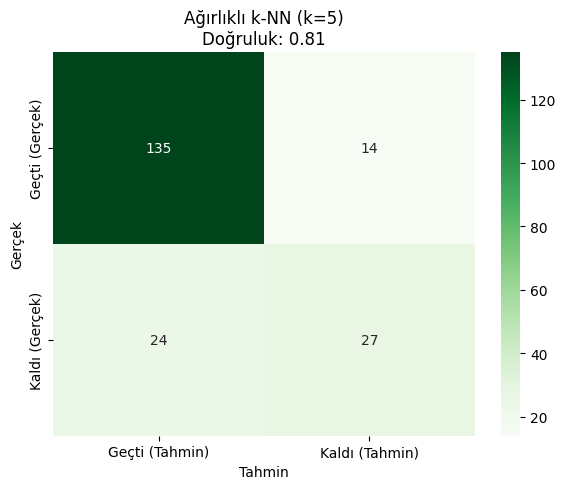

In [8]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Ağırlıklı k-NN modeli
knn_weighted = KNeighborsClassifier(n_neighbors=5, weights='distance')
knn_weighted.fit(X_train, y_train)
y_pred_weighted = knn_weighted.predict(X_test)

# Doğruluk ve sınıflandırma raporu
accuracy_weighted = accuracy_score(y_test, y_pred_weighted)
print("Ağırlıklı k-NN Sınıflandırma Raporu:")
print(classification_report(y_test, y_pred_weighted))
print("Doğruluk Oranı:", accuracy_weighted)

# Karışıklık Matrisi
conf_matrix_weighted = confusion_matrix(y_test, y_pred_weighted)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_weighted, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Geçti (Tahmin)', 'Kaldı (Tahmin)'],
            yticklabels=['Geçti (Gerçek)', 'Kaldı (Gerçek)'])
plt.xlabel("Tahmin")
plt.ylabel("Gerçek")
plt.title(f"Ağırlıklı k-NN (k=5)\nDoğruluk: {accuracy_weighted:.2f}")
plt.tight_layout()
plt.show()